In [1]:
import os
import numpy as np

from src.resnet import ResNet18
from src.preprocessing import Preprocessing
from src.pca import PCATransformer
from src.draw_figures import *

In [2]:
os.makedirs("./data", exist_ok=True) 
os.makedirs("./models", exist_ok=True) 
os.makedirs("./figures", exist_ok=True) 

In [3]:
# trainer = ResNet18(
#         data_dir="./data",
#         batch_size=64,
#         learning_rate=0.001,
#         num_epochs=10,
#         pretrained=True
#     )

# history = trainer.train() 

# trainer.save_model("models/weights_resnet18.pth")

In [3]:
prep = Preprocessing(
    weigths_path="models/weights_resnet18.pth",
    data_path="./data"
) 

train_CR, test_CR, train_WR, test_WR = prep.get_data()

/home/minin/workspace/ErrorCorrector/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Правильные предсказания (CR): 7949
Ошибки (WR): 2051


In [4]:
all_train = np.vstack((train_CR, train_WR))
pca = PCATransformer(n_components='auto', whiten=True) 
pca.fit(all_train)


train_CR_pca = pca.transform(train_CR)
train_WR_pca = pca.transform(train_WR)
test_CR_pca = pca.transform(test_CR)
test_WR_pca = pca.transform(test_WR)

<class 'numpy.ndarray'>
Финальное количество главных компонент: 17


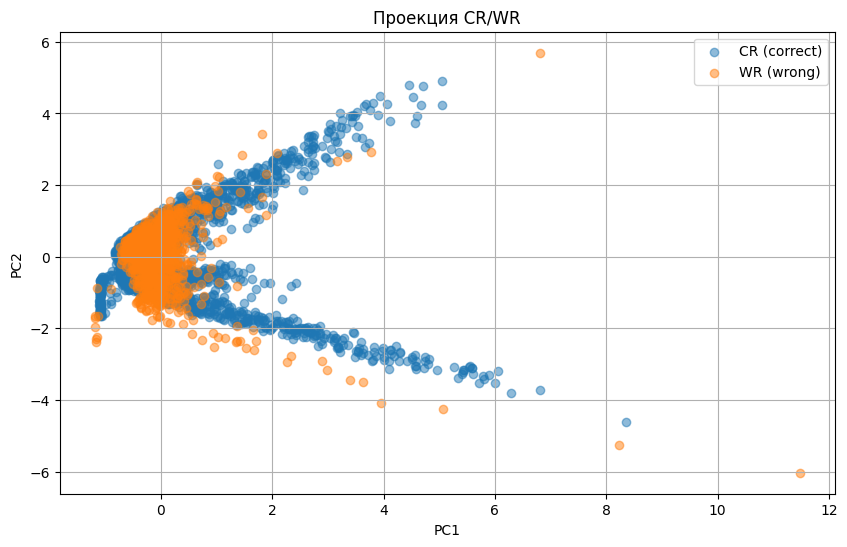

In [6]:
draw_pca_projection(train_CR_pca, train_WR_pca, save=True)